In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [28]:
co2_emissions = pd.read_excel("co2_emissions_2023.xlsx", sheet_name='fossil_CO2_totals_by_country')

In [29]:
ewaste_rate = pd.read_csv('ewaste_europe.csv')

In [30]:
co2_emissions['Country'] = co2_emissions['Country'].replace('Spain and Andorra', 'Spain')
co2_emissions['Country'] = co2_emissions['Country'].replace('Italy, San Marino and the Holy See', 'Italy')
co2_emissions['Country'] = co2_emissions['Country'].replace('France and Monaco', 'France')


In [31]:
# Convertir los nombres de las columnas a cadenas
co2_emissions.columns = co2_emissions.columns.astype(str)

In [32]:
# Seleccionar las columnas que corresponden al rango 2010 a 2018
columnas_interes = ['Country'] + [str(year) for year in range(2010, 2019)]
co2_emissions_2010_2018 = co2_emissions[columnas_interes]

In [33]:
co2_emissions_2010_2018

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,0.482207,0.290181,0.374857,0.412307,0.440689,0.462026,0.484889,0.466592,0.465881
1,Afghanistan,7.788893,11.408711,9.767756,8.300022,7.825741,8.346521,7.527594,8.066138,7.932005
2,Angola,22.739891,23.650038,24.716177,28.534220,30.887264,33.097499,31.285803,27.942099,26.258887
3,Anguilla,0.024024,0.026028,0.026044,0.027961,0.027917,0.028027,0.028363,0.029087,0.028247
4,International Aviation,466.657076,480.117814,483.676624,492.257229,507.505761,536.213680,560.173839,589.919315,615.937542
...,...,...,...,...,...,...,...,...,...,...
209,Zimbabwe,10.064956,15.845734,12.740022,12.715949,12.597723,12.689493,11.266275,10.585434,12.270039
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,EU27,3413.786632,3317.834810,3251.387665,3168.344668,3025.896239,3086.214921,3094.776695,3118.707522,3049.511170
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Obtener la lista de países del DataFrame de tasas de reciclaje
paises_ewaste = ewaste_rate.columns[1:]  # Asumimos que la primera columna es 'period' y los países empiezan desde la segunda columna

# Filtrar el DataFrame de emisiones de CO2 para que solo contenga los países de la lista
co2_emissions_filtrado = co2_emissions_2010_2018[co2_emissions_2010_2018['Country'].isin(paises_ewaste)]

# Agregar la fila de EU27
# Suponiendo que la fila de EU27 está etiquetada como 'EU27' en la columna 'Country'
# eu27 = co2_emissions_2010_2018[co2_emissions_2010_2018['Country'] == 'EU27']

# Concatenar el DataFrame filtrado con la fila de EU27
# co2_emissions_filtrado = pd.concat([co2_emissions_filtrado, eu27])

In [35]:
co2_emissions_filtrado.reset_index(inplace = True, drop= True)

In [36]:
co2_emissions_filtrado

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,73.795780,72.194687,69.027133,69.612680,65.929043,67.369130,67.782518,70.106335,67.186843
1,Belgium,114.977049,104.572538,103.086332,104.422497,97.724460,102.379092,101.260962,99.700388,100.098118
2,Bulgaria,49.507656,54.782564,49.915051,44.450948,47.314848,49.854209,47.122418,49.279523,46.233112
3,Cyprus,7.913449,7.655683,7.120797,6.439487,6.816116,6.855027,7.220692,7.361896,7.212725
4,Czechia,120.989103,118.112919,114.023160,109.525948,107.232822,108.284669,109.808230,110.375009,109.338938
5,Germany,815.378388,788.547704,800.464752,818.278373,779.223120,785.387181,789.713787,774.948179,747.214477
6,Denmark,48.556617,43.487547,38.592086,40.339128,36.204293,34.073592,35.706428,33.572356,33.654437
7,Spain,291.243111,293.161781,287.397089,260.597829,258.015469,275.078590,266.531106,281.695409,275.130061
8,Estonia,21.557955,21.673616,20.523597,22.914407,21.920755,19.990961,19.979761,21.222721,22.358838
9,Finland,65.842453,58.217076,52.320102,53.327236,49.437362,45.970950,48.803471,46.072987,47.434796


In [37]:
# Convertir a formato largo
co2_emissions_filtrado = pd.melt(co2_emissions_filtrado, id_vars=['Country'], var_name='Year', value_name='CO2_Emissions')

In [38]:
co2_emissions_filtrado

,Country,Year,CO2_Emissions
0,Austria,2010,73.795780
1,Belgium,2010,114.977049
2,Bulgaria,2010,49.507656
3,Cyprus,2010,7.913449
4,Czechia,2010,120.989103
...,...,...,...
265,Portugal,2018,51.270681
266,Romania,2018,82.989729
267,Slovakia,2018,37.210341
268,Slovenia,2018,15.343324


In [39]:
ewaste_rate.rename(columns={'period': 'Year'}, inplace=True)

In [40]:
ewaste_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           11 non-null     int64  
 1   Austria                        11 non-null     float64
 2   Belgium                        11 non-null     float64
 3   Bulgaria                       9 non-null      float64
 4   Cyprus                         9 non-null      float64
 5   Czechia                        9 non-null      float64
 6   Germany                        10 non-null     float64
 7   Denmark                        10 non-null     float64
 8   Estonia                        10 non-null     float64
 9   Greece                         11 non-null     float64
 10  Spain                          10 non-null     float64
 11  European Union - 27 countries  9 non-null      float64
 12  European Union - 28 countries  9 non-null      float

In [41]:
ewaste_rate.isnull().sum(axis=1)

0     21
1     11
2      3
3      3
4      2
5      2
6      0
7      0
8      1
9      2
10     5
dtype: int64

In [42]:
# Eliminar los años 2008 y 2009
ewaste_rate = ewaste_rate[~ewaste_rate['Year'].isin([2008, 2009])]

In [43]:
ewaste_rate.isnull().sum(axis=1)

2     3
3     3
4     2
5     2
6     0
7     0
8     1
9     2
10    5
dtype: int64

In [44]:
ewaste_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2 to 10
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           9 non-null      int64  
 1   Austria                        9 non-null      float64
 2   Belgium                        9 non-null      float64
 3   Bulgaria                       9 non-null      float64
 4   Cyprus                         8 non-null      float64
 5   Czechia                        9 non-null      float64
 6   Germany                        9 non-null      float64
 7   Denmark                        9 non-null      float64
 8   Estonia                        9 non-null      float64
 9   Greece                         9 non-null      float64
 10  Spain                          9 non-null      float64
 11  European Union - 27 countries  9 non-null      float64
 12  European Union - 28 countries  9 non-null      float64
 13

In [45]:
ewaste_rate.fillna(method='ffill', inplace=True)

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_32432\1521930138.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ewaste_rate.fillna(method='ffill', inplace=True)


In [46]:
ewaste_rate.fillna(method='bfill', inplace=True)

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_32432\458504787.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ewaste_rate.fillna(method='bfill', inplace=True)


In [47]:
ewaste_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2 to 10
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           9 non-null      int64  
 1   Austria                        9 non-null      float64
 2   Belgium                        9 non-null      float64
 3   Bulgaria                       9 non-null      float64
 4   Cyprus                         9 non-null      float64
 5   Czechia                        9 non-null      float64
 6   Germany                        9 non-null      float64
 7   Denmark                        9 non-null      float64
 8   Estonia                        9 non-null      float64
 9   Greece                         9 non-null      float64
 10  Spain                          9 non-null      float64
 11  European Union - 27 countries  9 non-null      float64
 12  European Union - 28 countries  9 non-null      float64
 13

In [48]:
ewaste_rate = ewaste_rate.drop(columns=['European Union - 27 countries', 'European Union - 28 countries', 'Liechtenstein'])

In [49]:
ewaste_rate = pd.melt(ewaste_rate, id_vars=['Year'], var_name='Country', value_name='e_waste_rate')


In [50]:
ewaste_rate = ewaste_rate.reindex(['Country', 'Year', 'e_waste_rate'], axis=1)
ewaste_rate = ewaste_rate.sort_values(by=['Country','Year'])
ewaste_rate

,Country,Year,e_waste_rate
0,Austria,2010,35.7
1,Austria,2011,37.1
2,Austria,2012,38.2
3,Austria,2013,37.6
4,Austria,2014,39.1
...,...,...,...
265,United Kingdom,2014,29.6
266,United Kingdom,2015,36.6
267,United Kingdom,2016,49.8
268,United Kingdom,2017,42.2


In [51]:
ewaste_rate.dtypes

Country          object
Year              int64
e_waste_rate    float64
dtype: object

In [52]:
co2_emissions_filtrado.dtypes

Country           object
Year              object
CO2_Emissions    float64
dtype: object

In [53]:
co2_emissions_filtrado = co2_emissions_filtrado.sort_values(by=['Country','Year'])
co2_emissions_filtrado.reset_index(inplace= True, drop= True)
co2_emissions_filtrado['Year'] = co2_emissions_filtrado['Year'].astype(int)
co2_emissions_filtrado

,Country,Year,CO2_Emissions
0,Austria,2010,73.795780
1,Austria,2011,72.194687
2,Austria,2012,69.027133
3,Austria,2013,69.612680
4,Austria,2014,65.929043
...,...,...,...
265,United Kingdom,2014,430.496235
266,United Kingdom,2015,415.856048
267,United Kingdom,2016,393.343901
268,United Kingdom,2017,381.285415


In [54]:
df_combined = pd.merge(ewaste_rate, co2_emissions_filtrado, on=['Country', 'Year'])

In [55]:
df_combined

,Country,Year,e_waste_rate,CO2_Emissions
0,Austria,2010,35.7,73.795780
1,Austria,2011,37.1,72.194687
2,Austria,2012,38.2,69.027133
3,Austria,2013,37.6,69.612680
4,Austria,2014,39.1,65.929043
...,...,...,...,...
265,United Kingdom,2014,29.6,430.496235
266,United Kingdom,2015,36.6,415.856048
267,United Kingdom,2016,49.8,393.343901
268,United Kingdom,2017,42.2,381.285415


## Ejemplos

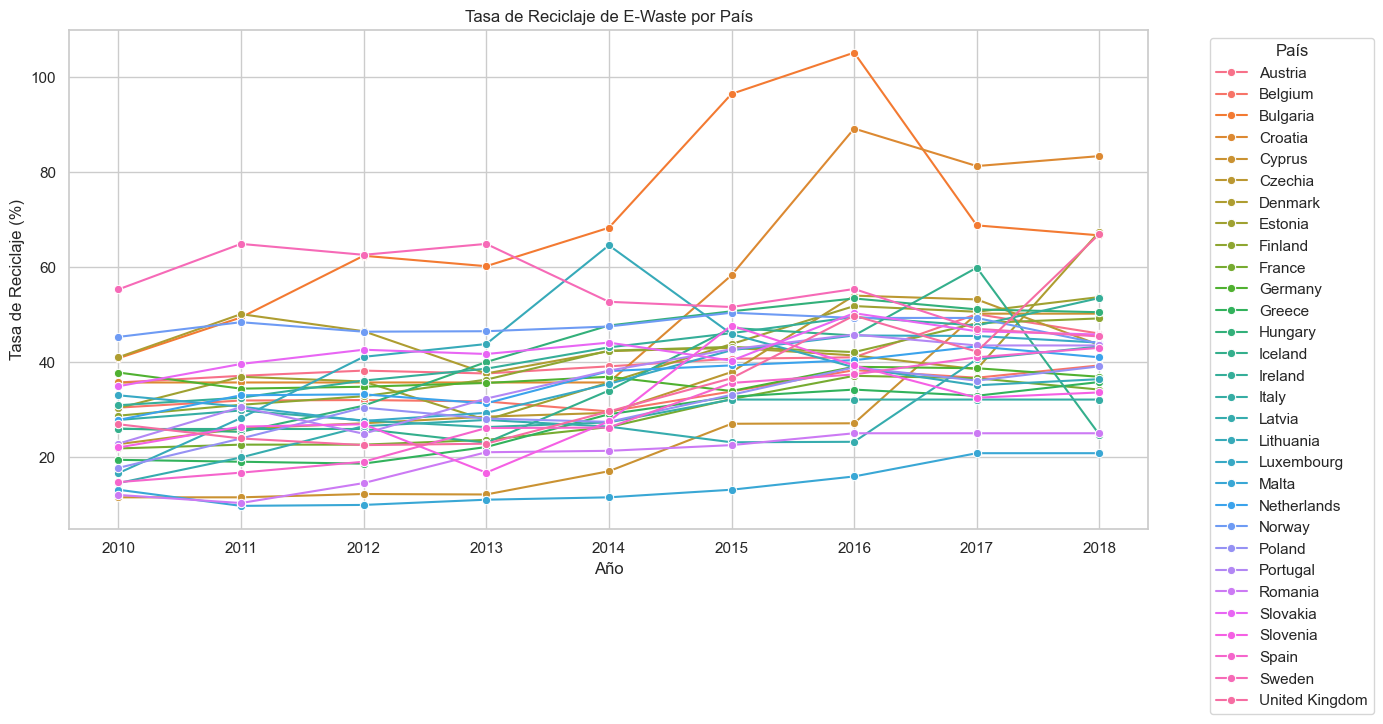

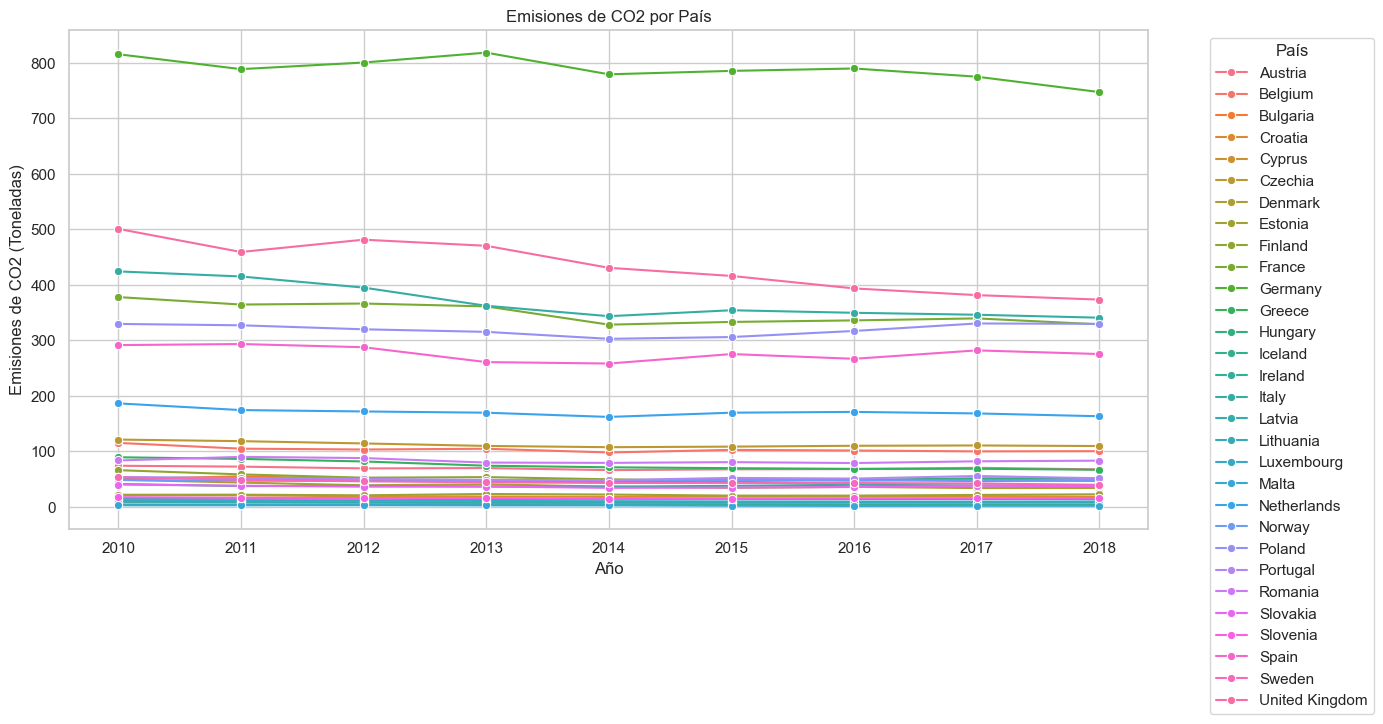

In [56]:
# Configuración del estilo de las gráficas
sns.set(style="whitegrid")

# Gráfica de líneas para e_waste_rate
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_combined, x='Year', y='e_waste_rate', hue='Country', marker='o')
plt.title('Tasa de Reciclaje de E-Waste por País')
plt.xlabel('Año')
plt.ylabel('Tasa de Reciclaje (%)')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfica de líneas para CO2 Emissions
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_combined, x='Year', y='CO2_Emissions', hue='Country', marker='o')
plt.title('Emisiones de CO2 por País')
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2 (Toneladas)')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

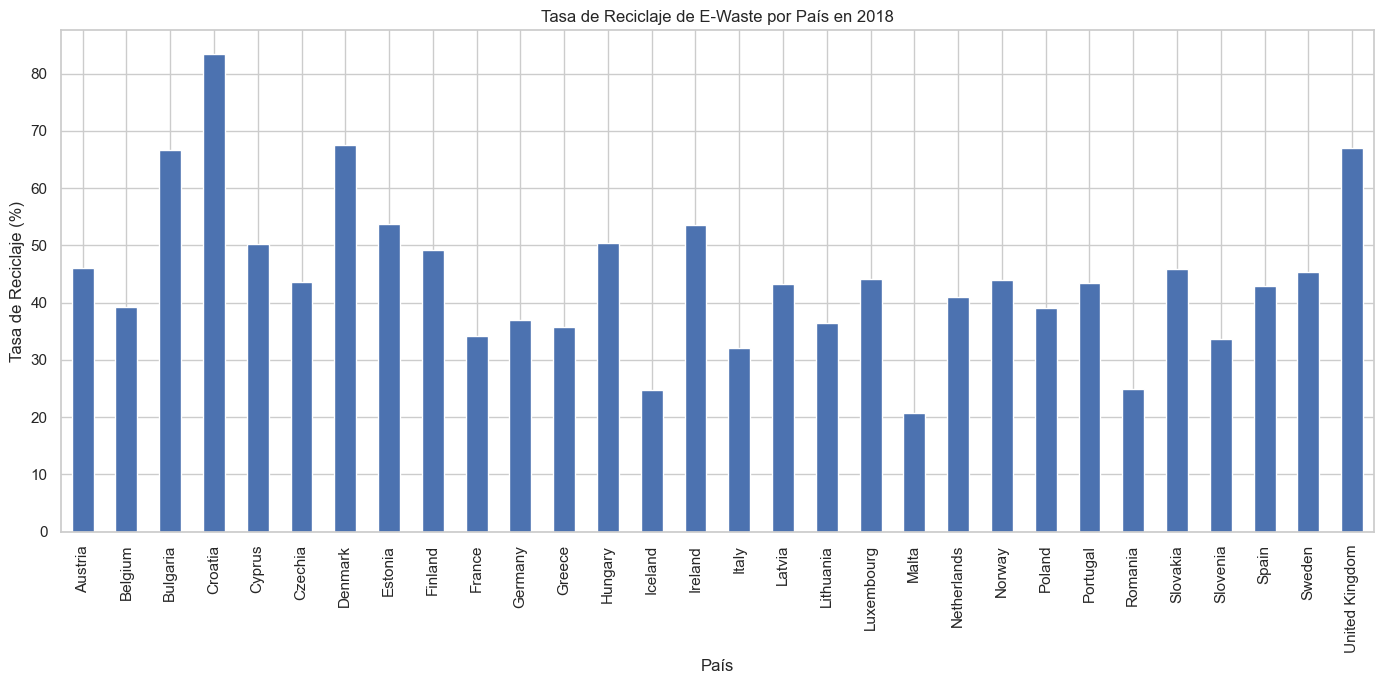

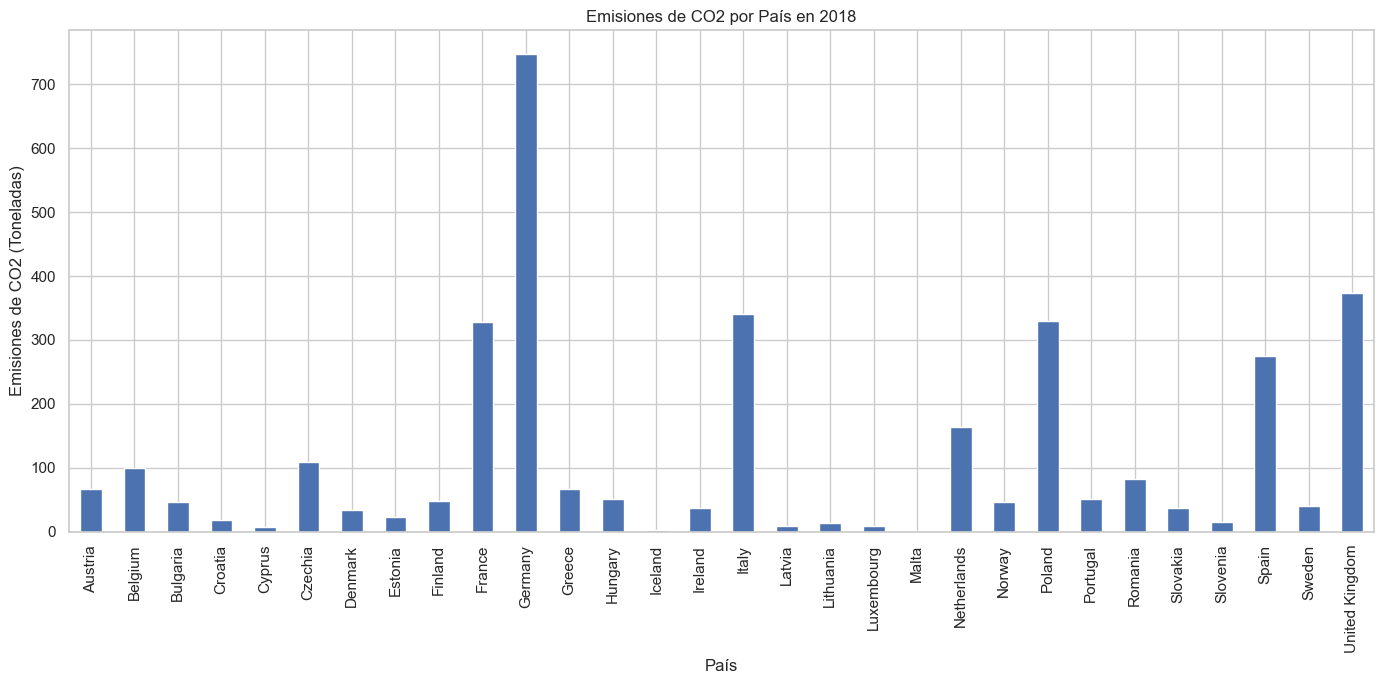

In [57]:
# Datos de ejemplo para el año 2018
df_2018 = df_combined[df_combined['Year'] == 2018]

# Gráfica de barras apiladas para e_waste_rate
plt.figure(figsize=(14, 7))
df_2018.set_index('Country')['e_waste_rate'].plot(kind='bar', stacked=True)
plt.title('Tasa de Reciclaje de E-Waste por País en 2018')
plt.xlabel('País')
plt.ylabel('Tasa de Reciclaje (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Gráfica de barras apiladas para CO2 Emissions
plt.figure(figsize=(14, 7))
df_2018.set_index('Country')['CO2_Emissions'].plot(kind='bar', stacked=True)
plt.title('Emisiones de CO2 por País en 2018')
plt.xlabel('País')
plt.ylabel('Emisiones de CO2 (Toneladas)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


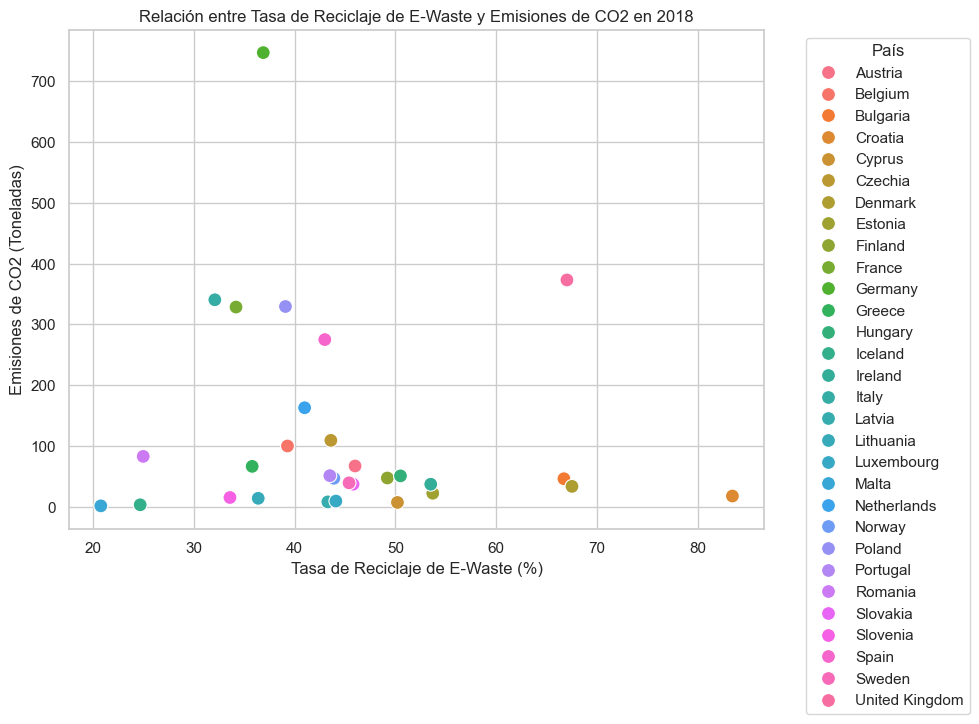

In [58]:
# Datos de ejemplo para el año 2018
df_2018 = df_combined[df_combined['Year'] == 2018]

# Gráfica de dispersión
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_2018, x='e_waste_rate', y='CO2_Emissions', hue='Country', s=100)
plt.title('Relación entre Tasa de Reciclaje de E-Waste y Emisiones de CO2 en 2018')
plt.xlabel('Tasa de Reciclaje de E-Waste (%)')
plt.ylabel('Emisiones de CO2 (Toneladas)')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


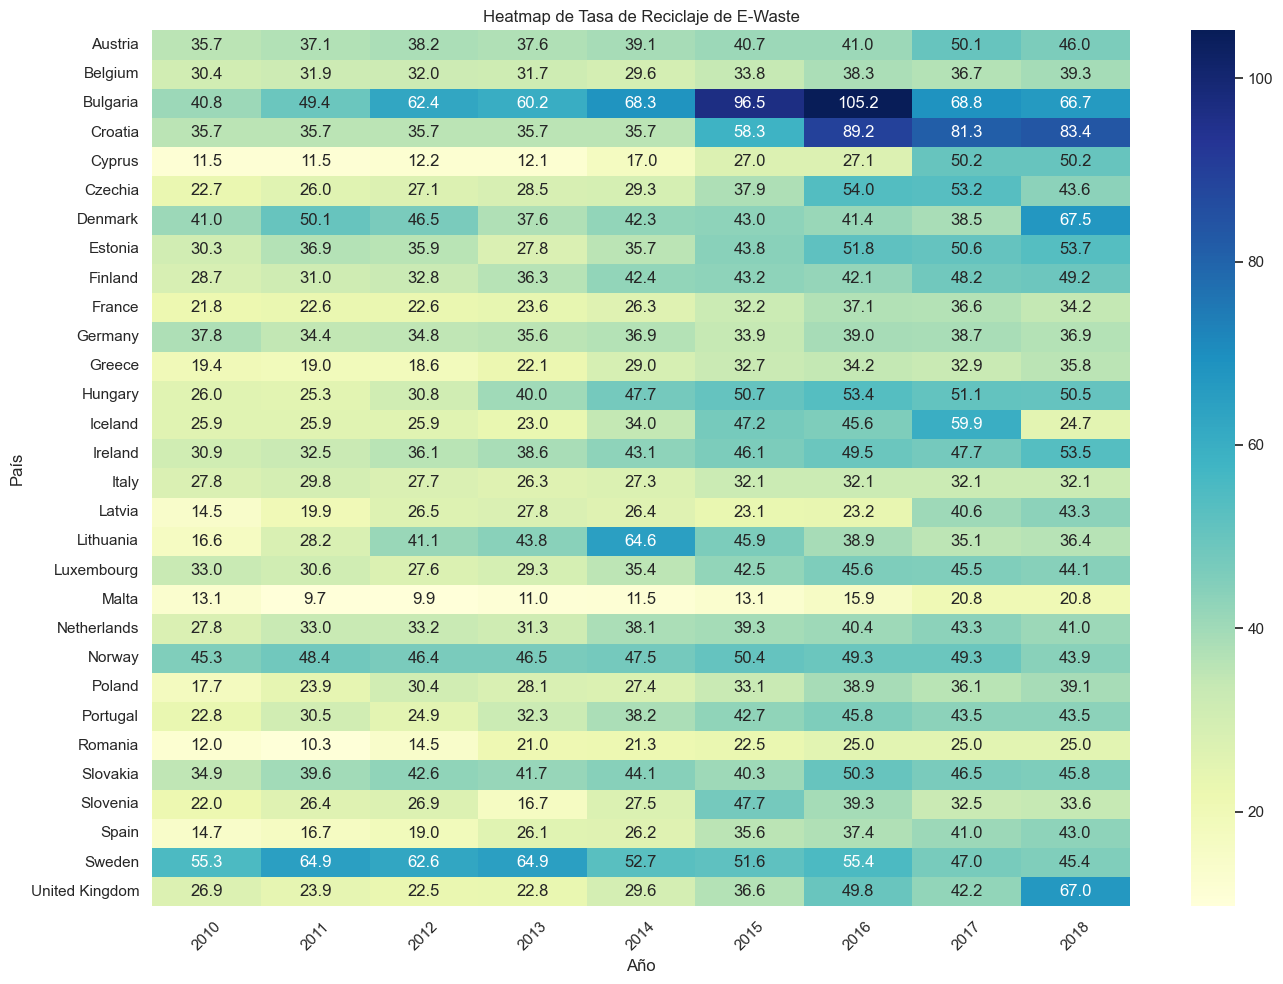

In [60]:

# Ejemplo de cómo pivotar el DataFrame
heatmap_data = df_combined.pivot(index='Country', columns='Year', values='e_waste_rate')

# Gráfica de heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Heatmap de Tasa de Reciclaje de E-Waste')
plt.xlabel('Año')
plt.ylabel('País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


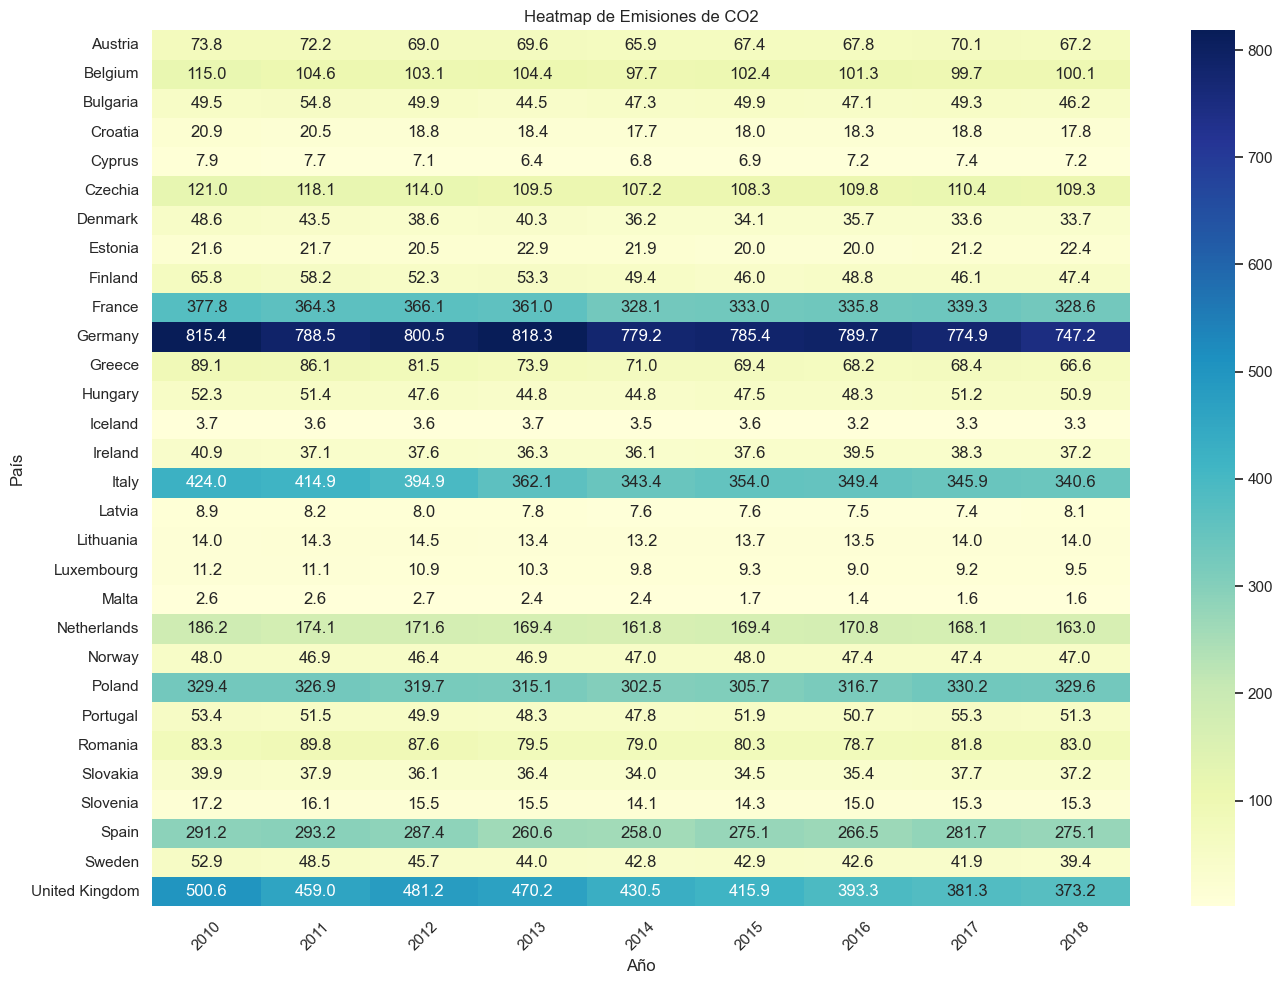

In [61]:
# Ejemplo de cómo pivotar el DataFrame para CO2 Emissions
heatmap_data_co2 = df_combined.pivot(index='Country', columns='Year', values='CO2_Emissions')

# Gráfica de heatmap para CO2 Emissions
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_co2, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Heatmap de Emisiones de CO2')
plt.xlabel('Año')
plt.ylabel('País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
